<a href="https://colab.research.google.com/github/disenodc/Imagenes_ML_UNS/blob/main/Aprobacion_del_curso_Tarea_Entregable_Imagenes%26IntroML_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Propuesta: haremos la tarea obligatoria mañana sábado de 9 a 11 en aula 23H. Sala de conferencias del Dpto Fisica. Traer compu personal

# 1. **Abrir una imagen y explorar sus datos.**

+ a) Abra la imagen *vegetacion_cielo.jpg* (de la carpeta compartida), grafíquela y muestre la dimensión (cantidad de filas, columnas, canlaes), muestre el tipo de dato que contiene. ✅



**IMPORTANTE: Realice comentarios e interpretaciones personales luego de los bloques de código.**

In [1]:
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Imagen=cv2.imread('vegetacion_cielo.jpg')

In [ ]:
Imagen=cv2.imread('vegetacion_cielo.jpg')
print("El tipo de la primer imagen es ",type(Imagen))
print("El tipo de cada píxel es ",Imagen.dtype)
print("La dimensión de la imagen es ",Imagen.shape)

altura=Imagen.shape[0] #cantidad de filas
ancho=Imagen.shape[1] #cantidad de columnas
canales=Imagen.shape[2] #cantidad de canales o resolución espectral 

print(f"La altura es {altura}.El ancho es {ancho} .Los canales de color son {canales}")



El tipo de la primer imagen es  <class 'numpy.ndarray'>
El tipo de cada píxel es  uint8
La dimensión de la imagen es  (1569, 1879, 3)
La altura es 1569.El ancho es 1879 .Los canales de color son 3


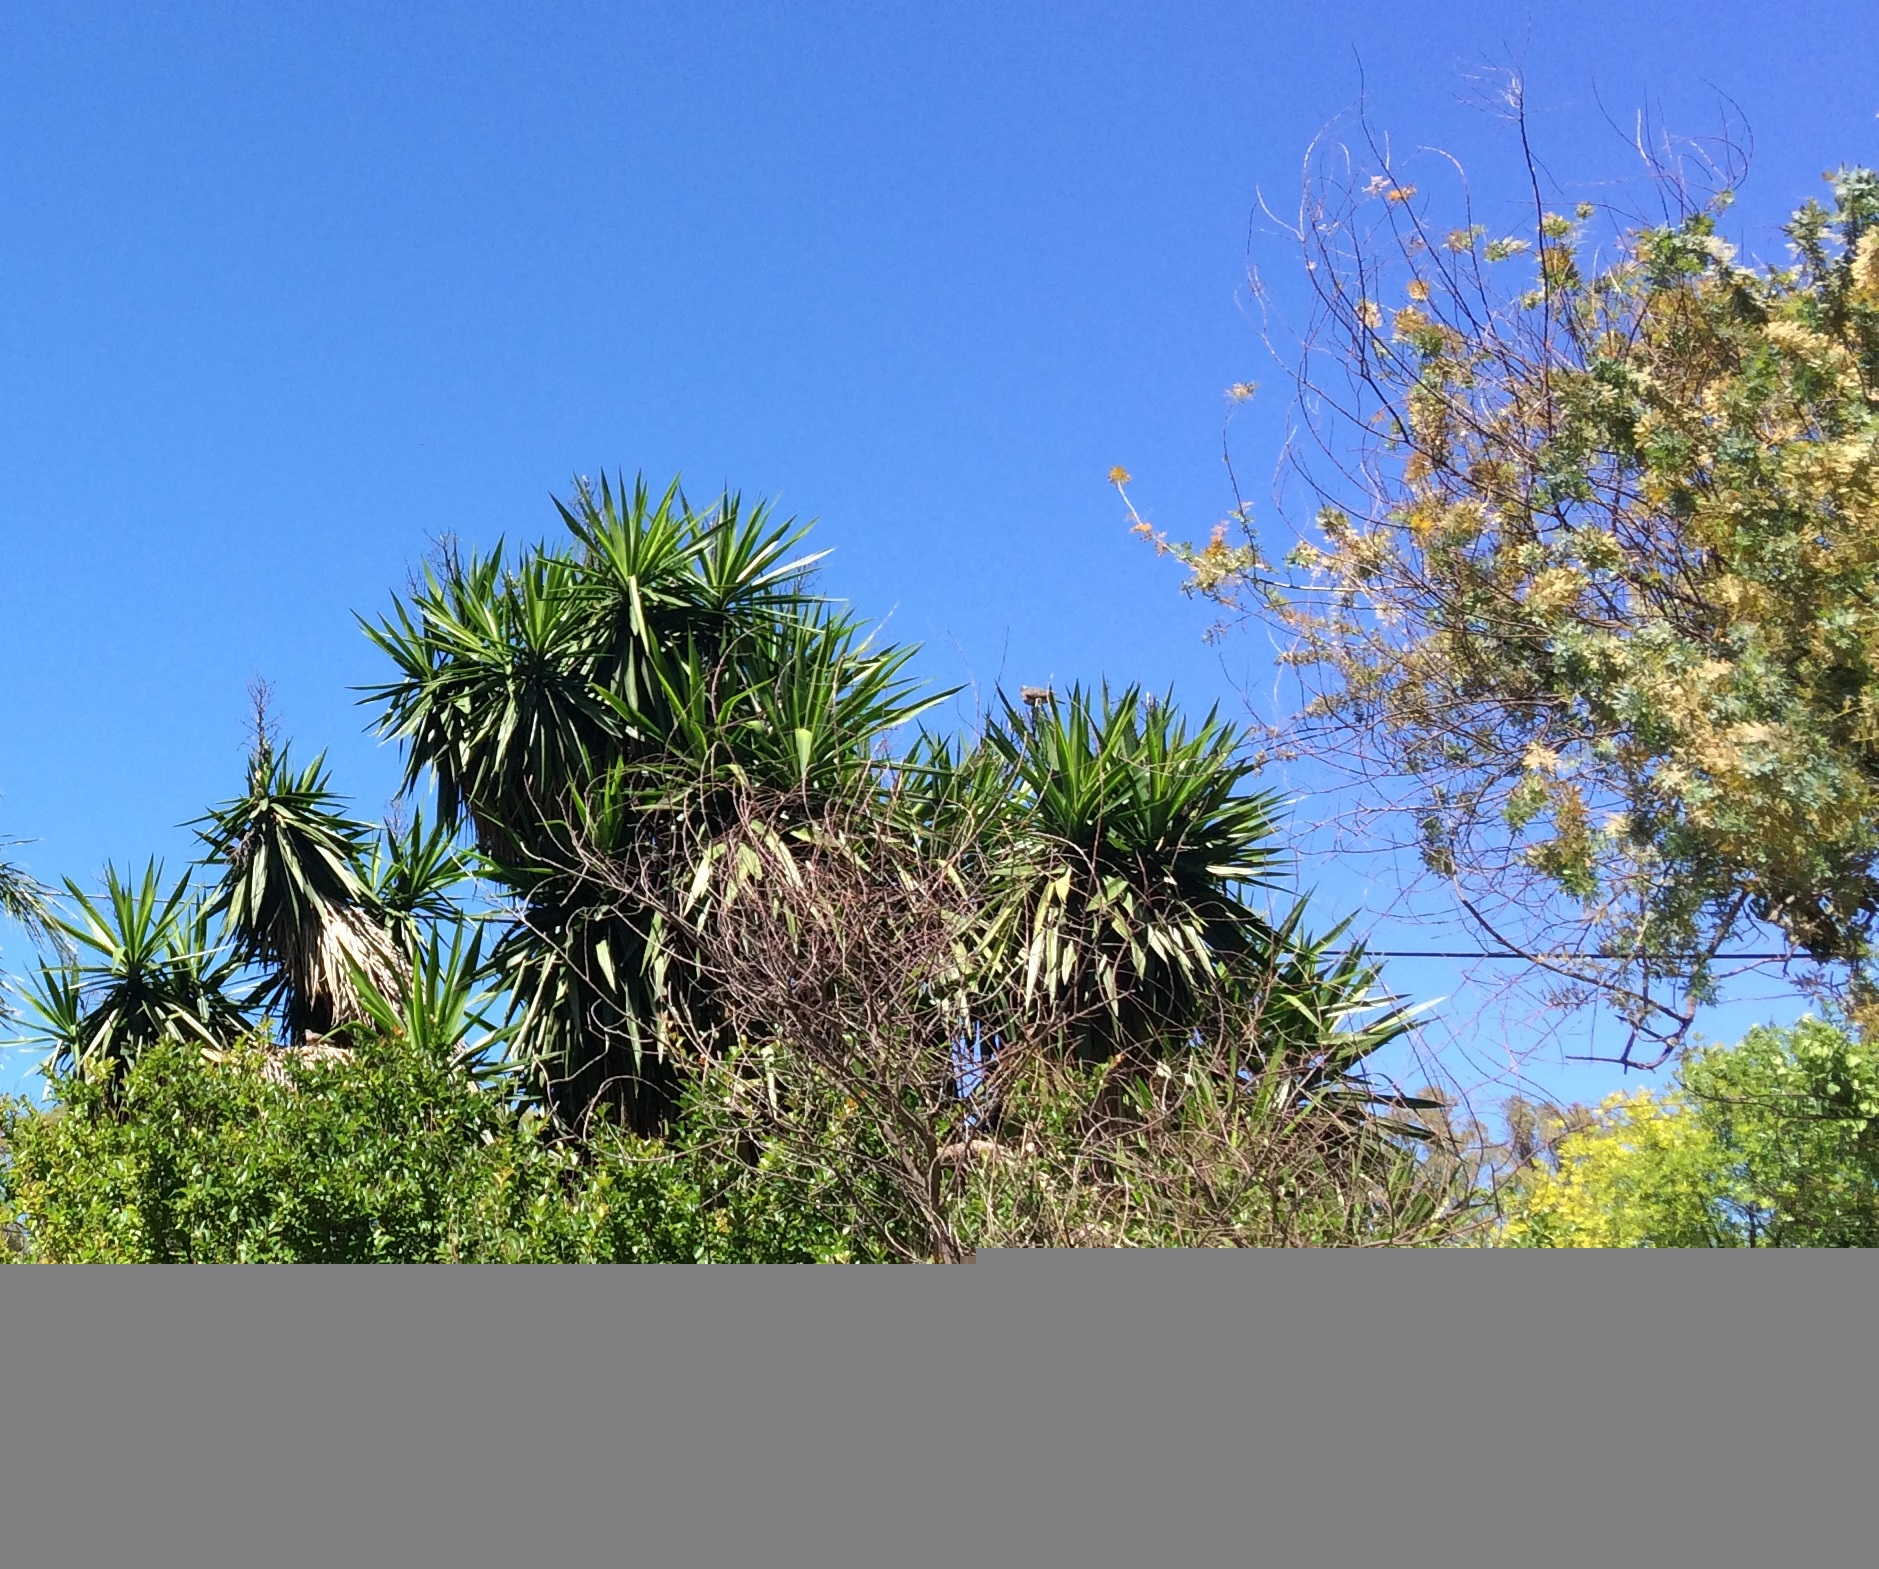

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(Imagen)

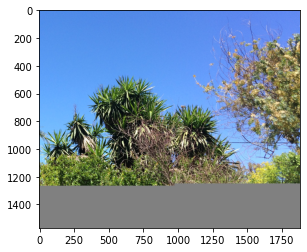

In [ ]:
Imagen=cv2.imread('vegetacion_cielo.jpg')
img_rgb=cv2.cvtColor(Imagen,cv2.COLOR_BGR2RGB )
import matplotlib.pyplot as plt
plt.imshow(img_rgb)

In [ ]:
# Al visualizar la imagen de varios metodos se detecta una perdida de valores en la misma.
Imagen[1400:1410,10:20]



In [ ]:
#se verifica que se corrompio el dato por lo que se procede a recortar las areas de dato perdidas

Imagen[1200: , : , : ]==128
# hasta fila 1264 FALSE 


# Desde fila 1265 TRUE = Perdida de dato
Imagen[1265: , : , : ]==128

array([[[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 

In [ ]:
# recortar imagen (1200 )

# especificar las coordenadas y el tamaño del recorte
x = 0
y = 0
w = 1500
h = 1265

# recortar la imagen utilizando las coordenadas y el tamaño especificados
img_recorte = img_rgb[y:y+h, x:x+w]

# mostrar la imagen recortada
cv2.imshow("Recorte", img_recorte)



+ b) Realice el histograma de los 3 canales en un mismo gráfico. **Interprete y comente.** 



In [ ]:
# 1.2 Histograma

import numpy as np

nbins=64
rango=[0,255] #rango de intensidades que quiero que cuente el histograma.
#rango=[0,128]

plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img_recorte,cmap='gray',vmin=0 ,vmax=255), plt.title('Imagen en grayscale')
plt.subplot(122), plt.hist(img_recorte.ravel(),nbins,rango) 
#img.ravel() "estira" img_mono en un vector, es decir concatena las filas de img en un solo vector
plt.xlabel("Bins de Intensidad de Iluminación")
plt.ylabel("Cantidad de Píxeles pon bin")
plt.title("Histograma")
plt.show()


In [ ]:
#Chequeamos lo que vemos en el histo que el rango dinámico de la imagen es pequeño 
print(np.min(img_recorte),np.max(img_recorte))

In [ ]:
#Histogramas de R, G y B 
#path=''
#img = cv2.imread(path)
cv2_imshow(img_recorte)

color = ('b','g','r')
for i, c in enumerate(color):
    hist = cv2.calcHist([img_recorte], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
plt.title('Histogramas')
plt.legend(['azul','verde','rojo'])
plt.show()

# 2. **Binarización.** 

+ a) Pase la imagen a monocroma. Elija un umbral adecuado para binarizar dicha imagen monocroma, que *intente* separar el cielo de la vegentación, 
+ b) Muestre en subplots, la imagen original, la monocroma en escala de grises y la binarizada. Comente e interprete resultados.

In [ ]:
# Monocroma

path='vegetacion_cielo.jpg'
img_mono = cv2.imread(img_recorte,cv2.IMREAD_GRAYSCALE) #leemos la imagen monocroma que en este caso es la misma que la dada
print(img_mono.shape,img_mono[20,30])
print(f'la minima intensidad es {np.min(img_mono)}')
print(f'la maxima intensidad es {np.max(img_mono)}')
print(f'el tipo de dato de la imagen es {img_mono.dtype}')

cv2_imshow(img_mono)

# 3. **Clustering**

+ a) Pase la misma imagen vegetacion_cielo.jpg, a formato Data Frame (cada pixel en una fila)
+ b) Elija algún modelo de Clusterización (k-means,DBCAN, MeanShift) para realizar clusterización dentro de dicha imagen. 
Utilice las características que crea necesarias  y adecuadas para el problema (RGB a priori, pero pueden ser otras como las usadas en Ntb8).
¿Cuantos clusters recomienda el método del codo? ¿Concuerda con lo que ve en la imagen? 
+ c) Grafique los resultados de la clusterización en el espacio RGB y también en la imagen etiquetada por clusters.Obtuvo los resultados esperados? Comente, interprete.